# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [1]:
# Load the needed libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline 
import seaborn as sns
import os
import requests
import json

In [2]:
# Load the WeRateDogs Twitter archive data into a df
tweet_arc = pd.read_csv("twitter_archive_enhanced.csv")

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
# Using the requests library to download the tweet image prediction
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open(url.split('/')[-1], mode = 'wb') as outfile:
    outfile.write(response.content)

# Read the downloaded file into a dataframe
tweet_image = pd.read_csv('image-predictions.tsv', sep = '\t', encoding = 'utf-8')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

    After so much back and forth with the twitter api team,i as told my application for Elevated access to the Twitter API was not approved. Therefore, i would be working with the file provided for.

In [4]:
# read this tweet-json.txt file line by line into a pandas DataFrame

list_collection = []
with open('tweet-json.txt') as ls:
    List = ls.readlines()
    for line in List:
        first_man = json.loads(line)
        list_collection.append(first_man)
        
df = pd.DataFrame(list_collection)

In [5]:
tweet_json = df[['id','retweet_count','favorite_count','created_at',]]
tweet_json.columns = ['tweet_id','retweet_count','favorite_count','created_at']

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [6]:
# check file content of 
tweet_arc

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [7]:
# check to the file content
tweet_image

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
#check file content
tweet_json

,tweet_id,retweet_count,favorite_count,created_at
0,892420643555336193,8853,39467,Tue Aug 01 16:23:56 +0000 2017
1,892177421306343426,6514,33819,Tue Aug 01 00:17:27 +0000 2017
2,891815181378084864,4328,25461,Mon Jul 31 00:18:03 +0000 2017
3,891689557279858688,8964,42908,Sun Jul 30 15:58:51 +0000 2017
4,891327558926688256,9774,41048,Sat Jul 29 16:00:24 +0000 2017
5,891087950875897856,3261,20562,Sat Jul 29 00:08:17 +0000 2017
6,890971913173991426,2158,12041,Fri Jul 28 16:27:12 +0000 2017
7,890729181411237888,16716,56848,Fri Jul 28 00:22:40 +0000 2017
8,890609185150312448,4429,28226,Thu Jul 27 16:25:51 +0000 2017
9,890240255349198849,7711,32467,Wed Jul 26 15:59:51 +0000 2017


In [9]:
tweet_arc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
tweet_image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [11]:
tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
created_at        2354 non-null object
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


In [12]:
tweet_arc.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [13]:
#tweet.sample(10)

In [14]:
# To find duplicate column names in the three tables 

all_columns = pd.Series(list() + list(tweet_image) + list(tweet_json))
all_columns[all_columns.duplicated()]

12    tweet_id
dtype: object

In [15]:
tweet_arc.tweet_id.value_counts()

749075273010798592    1
741099773336379392    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
676430933382295552    1
743510151680958465    1
837012587749474308    1
833722901757046785    1
818259473185828864    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
670093938074779648    1
759923798737051648    1
809920764300447744    1
805487436403003392    1
838085839343206401    1
                     ..
763956972077010945    1
870308999962521604    1
720775346191278080    1
785927819176054784    1
783347506784731136    1
775733305207554048    1
834209720923721728    1
825026590719483904    1
758405701903519748    1
668986018524233728    1
6909388994772213

In [16]:
#tweet_arc[tweet_id.duplicated()]

In [17]:
#tweet_image[tweet_image.tweet_id.duplicated()]

In [18]:
#tweet_json[tweet_json.tweet_id.duplicated()]

In [19]:
tweet_arc.source.value_counts() 

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [20]:
tweet_image[tweet_image.jpg_url.duplicated()]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1297,752309394570878976,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
1315,754874841593970688,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False
1333,757729163776290825,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
1345,759159934323924993,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
1349,759566828574212096,https://pbs.twimg.com/media/CkNjahBXAAQ2kWo.jpg,1,Labrador_retriever,0.967397,True,golden_retriever,0.016641,True,ice_bear,0.014858,False
1364,761371037149827077,https://pbs.twimg.com/tweet_video_thumb/CeBym7...,1,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1368,761750502866649088,https://pbs.twimg.com/media/CYLDikFWEAAIy1y.jpg,1,golden_retriever,0.586937,True,Labrador_retriever,0.398260,True,kuvasz,0.005410,True
1387,766078092750233600,https://pbs.twimg.com/media/ChK1tdBWwAQ1flD.jpg,1,toy_poodle,0.420463,True,miniature_poodle,0.132640,True,Chesapeake_Bay_retriever,0.121523,True
1407,770093767776997377,https://pbs.twimg.com/media/CkjMx99UoAM2B1a.jpg,1,golden_retriever,0.843799,True,Labrador_retriever,0.052956,True,kelpie,0.035711,True
1417,771171053431250945,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True


In [21]:
tweet_arc.dtypes

tweet_id                        int64
in_reply_to_status_id         float64
in_reply_to_user_id           float64
timestamp                      object
source                         object
text                           object
retweeted_status_id           float64
retweeted_status_user_id      float64
retweeted_status_timestamp     object
expanded_urls                  object
rating_numerator                int64
rating_denominator              int64
name                           object
doggo                          object
floofer                        object
pupper                         object
puppo                          object
dtype: object

In [22]:
tweet_image.dtypes

tweet_id      int64
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

In [23]:
tweet_json.dtypes

tweet_id           int64
retweet_count      int64
favorite_count     int64
created_at        object
dtype: object

In [24]:
tweet_arc[['rating_numerator', 'rating_denominator']].describe() 

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [25]:
tweet_arc.rating_numerator.value_counts() 

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [26]:
tweet_arc.rating_denominator.value_counts() 

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [27]:
tweet_arc.name.value_counts() 

None          745
a              55
Charlie        12
Oliver         11
Lucy           11
Cooper         11
Penny          10
Tucker         10
Lola           10
Bo              9
Winston         9
the             8
Sadie           8
Daisy           7
Toby            7
Buddy           7
Bailey          7
an              7
Dave            6
Bella           6
Rusty           6
Milo            6
Koda            6
Stanley         6
Scout           6
Jax             6
Leo             6
Oscar           6
Jack            6
Bentley         5
             ... 
Peanut          1
Andy            1
Dietrich        1
Gunner          1
Newt            1
Ziva            1
Holly           1
Longfellow      1
Corey           1
Tanner          1
Clarq           1
old             1
Winifred        1
Rambo           1
Moofasa         1
Harry           1
Mack            1
Creg            1
incredibly      1
Doobert         1
Coopson         1
Trevith         1
Jockson         1
Alexander       1
Filup     

### Quality issues
1. Issues with the timestamp, retweeted_status_timestamp, source column on the tweet_arc dataframe.

2. Column names on the tweet_arc dataframe should be more explicit and clean.

3. There is an html link after the exact text in the text column of the tweet_arc dataframe.

4. Preceeding html link on the source column values(remove the html link) on the tweet_arc dataframe.

5. Dogs should be rated over 10 in the rating_denominator column. We have invalid values like(0,2, 11, 50, 80)

6.  Float values in the rating_denominator column.

7. Couple of Values in the rating_numerator seems outrageous on the tweet_arc dataframe

8. Wrong datatype on the created_at column on the tweet_json dataframe

### Tidiness issues

1. Merge all the columns of the four dog stages to a single column and drop the 4 other columns in the table.

2. Dissolve the predictions and confidence level columns in the prediction and confidence level column. 

3. Drop columns no longer needed for further analysis.

4. Merge all 3 dataframes into one.

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [28]:
# Make copies of the original dataframes
tweet_arc_clean = tweet_arc.copy()
tweet_image_clean = tweet_image.copy()
tweet_json_clean = tweet_json.copy()

### Issue #1:

Column names with erroneous datatypes on the tweet_arc dataframe

#### Define:

Uisng the .astype and to_datetime functions, columns names in the tweet_arc dataframe would be changed to their correct corresponding datatypes.

#### Code

In [29]:
tweet_arc_clean['tweet_id'] = tweet_arc_clean['tweet_id'].astype(object)
tweet_arc_clean['timestamp'] = pd.to_datetime(tweet_arc_clean.timestamp)
tweet_arc_clean['source'] = tweet_arc_clean['source'].astype('category')
tweet_arc_clean['rating_numerator'] = tweet_arc_clean['rating_numerator'].astype(float)

#### Test

In [30]:
tweet_arc_clean.dtypes

tweet_id                              object
in_reply_to_status_id                float64
in_reply_to_user_id                  float64
timestamp                     datetime64[ns]
source                              category
text                                  object
retweeted_status_id                  float64
retweeted_status_user_id             float64
retweeted_status_timestamp            object
expanded_urls                         object
rating_numerator                     float64
rating_denominator                     int64
name                                  object
doggo                                 object
floofer                               object
pupper                                object
puppo                                 object
dtype: object

### Issue #2:
Column names on the tweet_arc dataframe should be more explicit and self explanatory.

#### Define
Column names such as timestamp,source,text,name should be given more expressive names. Using the .rename function in renaming the column names.

#### Code

In [31]:
tweet_arc_clean = tweet_arc_clean.rename(columns = {'timestamp' :'tweet_date' ,'source' : 'tweet_source','text' : 'tweet_content','name': 'dog_name'})

#### Test

In [32]:
list(tweet_arc_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_date',
 'tweet_source',
 'tweet_content',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

### Issue #3:
There is an html link after the exact text in the tweet_content column of the tweet_arc dataframe.

#### Define
For data to be tidy, it should not be muddled up with other information. Here we have an html link should distorts the content of the tweet. Using the str.replace and regex. https://stackoverflow.com/questions/51994254/removing-url-from-a-column-in-pandas-dataframe

#### Code

In [33]:
tweet_arc_clean['tweet_content'] = tweet_arc_clean['tweet_content'].str.replace('http\S+|www.\S+', '', case=False)

#### Test

In [34]:
pd.set_option('display.max_colwidth', 1)
tweet_arc_clean['tweet_content']

0       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10                                                      
1       This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 
2       This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10                  
3       This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us                                                            
4       This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek 
5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek 
6       Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by cli

### Issue #4:

Preceeding html link on the tweet_source column values(remove the html link) on the tweet_arc dataframe.

#### Define

Using the str.replace and regex pattern, remove the html url makes the column values clearer. Now we totally understand what tweet source means: https://stackoverflow.com/questions/64051234/question-on-using-string-replace-and-regex-to-clean-data

#### Code

In [35]:
#tweet_arc_clean['tweet_source']

tweet_arc_clean['tweet_source'] = tweet_arc_clean['tweet_source'].str.replace(r'^<a.*nofollow">(.*)<\/a>$', r'\1')


#### Test

In [36]:
tweet_arc_clean['tweet_source'].value_counts()

Twitter for iPhone     2221
Vine - Make a Scene    91  
Twitter Web Client     33  
TweetDeck              11  
Name: tweet_source, dtype: int64

### Issue #5:

Dogs should be rated over 10 in the rating_denominator column. We have invalid values like(0,2, 11, 50, 80)

#### Define
All ratings are meant to be based over the value 10. Due to some reasons the denominator was distorted and we have few varing numbers. We simply assign the value 10 to the rating denominator.

#### Code

In [37]:
tweet_arc_clean['rating_denominator'] = 10

#### Test

In [38]:
tweet_arc_clean['rating_denominator'].value_counts()

10    2356
Name: rating_denominator, dtype: int64

### Issue #6:
Float values in the rating_denominator column.

#### Define
There are numerator values with are actually float values as depicted in the tweet_content column but they look like outliers and also change the rating_nuemrator column to a float, becuase float values are included.

#### Code

In [39]:
#display rating_numerators with float values based on tweet_content.
with pd.option_context('max_colwidth', 200):
    display(tweet_arc_clean[tweet_arc_clean['tweet_content'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'tweet_content', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  This is separate from the ipykernel package so we can avoid doing imports until


,tweet_id,tweet_content,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",5.0,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75.0,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",75.0,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,27.0,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5.0,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,26.0,10


In [40]:
#complete value update line by line
tweet_arc_clean.loc[(tweet_arc_clean.tweet_id == 883482846933004288), 'rating_numerator'] = 13.5
tweet_arc_clean.loc[(tweet_arc_clean.tweet_id == 832215909146226688), 'rating_numerator'] = 9.75
tweet_arc_clean.loc[(tweet_arc_clean.tweet_id == 786709082849828864), 'rating_numerator'] = 9.75
tweet_arc_clean.loc[(tweet_arc_clean.tweet_id == 778027034220126208), 'rating_numerator'] = 11.27
tweet_arc_clean.loc[(tweet_arc_clean.tweet_id == 681340665377193984), 'rating_numerator'] = 9.5
tweet_arc_clean.loc[(tweet_arc_clean.tweet_id == 680494726643068929), 'rating_numerator'] = 11.26

#### Test

In [41]:
with pd.option_context('max_colwidth', 200):
    display(tweet_arc_clean[tweet_arc_clean['tweet_content'].str.contains(r"(\d+\.\d*\/\d+)")]
            [['tweet_id', 'tweet_content', 'rating_numerator', 'rating_denominator']])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


,tweet_id,tweet_content,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10",13.50,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10",9.75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back,11.27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,9.50,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10,11.26,10


### Issue #7:

Rating_numerator values which look like outliers/wrong values but are actually float ratings.

#### Define

There are numerator values which are actually float values but look like outliers and also change the rating_nuemrator column to a float, because float values are included . This propably occured when the files were copied. The maximum rating should be 14 because "the dog was too good".

#### Code

In [42]:
mean = tweet_arc_clean['rating_numerator'].mean()

In [43]:
def func_df(tweet_arc_clean):
    if tweet_arc_clean['rating_numerator'] > 14 or tweet_arc_clean['rating_numerator'] < 6:
        return  mean
    return tweet_arc_clean['rating_numerator']

In [44]:
tweet_arc_clean['rating_numerator'] = tweet_arc_clean.apply(lambda x : func_df(x), axis = 1)

#### Test

In [45]:
tweet_arc_clean.rating_numerator.value_counts()

12.00000    558
11.00000    464
10.00000    461
13.00000    351
9.00000     158
13.06368    115
8.00000     102
7.00000     55 
14.00000    54 
6.00000     32 
9.75000     2  
11.27000    1  
11.26000    1  
9.50000     1  
13.50000    1  
Name: rating_numerator, dtype: int64

### Issue #8:
Wrong datatype on the rating_numerator on the tweet_arc_clean and the created_at column on the tweet_json dataframe

#### Define
The rating_numerator datatype should be changed to a float while the created_at column should be be changed to datetime.

#### Code

In [46]:
tweet_arc_clean['rating_numerator'] = tweet_arc_clean['rating_numerator'].astype('float')
tweet_json_clean['created_at'] = pd.to_datetime(tweet_json_clean.created_at)

#### Test

In [47]:
tweet_arc_clean.dtypes

tweet_id                      object        
in_reply_to_status_id         float64       
in_reply_to_user_id           float64       
tweet_date                    datetime64[ns]
tweet_source                  object        
tweet_content                 object        
retweeted_status_id           float64       
retweeted_status_user_id      float64       
retweeted_status_timestamp    object        
expanded_urls                 object        
rating_numerator              float64       
rating_denominator            int64         
dog_name                      object        
doggo                         object        
floofer                       object        
pupper                        object        
puppo                         object        
dtype: object

In [48]:
tweet_json_clean.dtypes

tweet_id          int64         
retweet_count     int64         
favorite_count    int64         
created_at        datetime64[ns]
dtype: object

### Tidiness issues

### Issue #1:
Merge all the columns of the four dog stages to a single column and drop the 4 other columns in the table.

#### Define
Dog stages : doggo, floofer, pupper and puppo columns in twitter_arc_clean table would be merged into one column named "dog_stage"

#### Code

In [49]:
tweet_arc_clean['sum_all'] = tweet_arc_clean.doggo + tweet_arc_clean.floofer + tweet_arc_clean.pupper + tweet_arc_clean.puppo

In [50]:
tweet_arc_clean.sum_all.value_counts()

NoneNoneNoneNone        1976
NoneNonepupperNone      245 
doggoNoneNoneNone       83  
NoneNoneNonepuppo       29  
doggoNonepupperNone     12  
NoneflooferNoneNone     9   
doggoNoneNonepuppo      1   
doggoflooferNoneNone    1   
Name: sum_all, dtype: int64

In [51]:
#create function to check and merge various dog stages
def check_stages(archive):
    if archive['sum_all'].count('None') == 2:
        return 'Multiple' 
    else:
        if archive['sum_all'].count('doggo') == 1:
            return 'Doggo'
        elif archive['sum_all'].count('floofer') == 1:
            return 'Floofer'
        elif archive['sum_all'].count('pupper') == 1:
            return 'Pupper'
        elif archive['sum_all'].count('puppo') == 1:
            return 'Puppo'
        else:
            return 'None'

tweet_arc_clean['dog_stage'] = tweet_arc_clean.apply(check_stages, axis=1)

#### Test

In [52]:
list(tweet_arc_clean)

['tweet_id',
 'in_reply_to_status_id',
 'in_reply_to_user_id',
 'tweet_date',
 'tweet_source',
 'tweet_content',
 'retweeted_status_id',
 'retweeted_status_user_id',
 'retweeted_status_timestamp',
 'expanded_urls',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'sum_all',
 'dog_stage']

In [53]:
tweet_arc_clean['dog_stage'].value_counts()

None        1976
Pupper      245 
Doggo       83  
Puppo       29  
Multiple    14  
Floofer     9   
Name: dog_stage, dtype: int64

### Issue #2:
Dissolve the predictions and confidence level columns in the prediction and confidence level column.

#### Define
We would dissolve the predictions column(p1,p2,p3) and the confidence level (p1_conf,p2_conf,p3_conf) first true value into and equivalent prediction column(p_dog) and similarly the confidence level into column (P_conf).

#### Code

In [54]:
# This will store the fisrt true algorithm(p1,p2 or p3) with it's equivalent level of confidence(p1_conf, p2_conf, p3_conf)
p_dog = []
p_conf = []

def get_prediction_confidence(df):
    if df['p1_dog'] == True:
        p_dog.append(df['p1'])
        p_conf.append(df['p1_conf'])
    elif df['p2_dog'] == True:
        p_dog.append(df['p2'])
        p_conf.append(df['p2_conf'])
    elif df['p3_dog'] == True:
        p_dog.append(df['p3'])
        p_conf.append(df['p3_conf'])
    else:
        p_dog.append('NaN') #if prediction is false, NaN is assigned
        p_conf.append(0)

tweet_image_clean.apply(get_prediction_confidence, axis=1)
tweet_image_clean['p_dog'] = p_dog
tweet_image_clean['p_conf'] = p_conf

#### Test

In [55]:
list(tweet_image_clean)

['tweet_id',
 'jpg_url',
 'img_num',
 'p1',
 'p1_conf',
 'p1_dog',
 'p2',
 'p2_conf',
 'p2_dog',
 'p3',
 'p3_conf',
 'p3_dog',
 'p_dog',
 'p_conf']

In [56]:
tweet_image_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 14 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
p_dog       2075 non-null object
p_conf      2075 non-null float64
dtypes: bool(3), float64(4), int64(2), object(5)
memory usage: 184.5+ KB


### Issue #3:
Drop columns no longer needed for further analysis.

#### Define
Drop columns from both tweet_arc_clean and tweet_image_clean columns. They are no longer needed and should be gotten rid of to prevent clumsiness.

#### Code

In [57]:
tweet_arc_clean.drop(["in_reply_to_status_id","in_reply_to_user_id","retweeted_status_id","retweeted_status_user_id","expanded_urls","retweeted_status_timestamp","doggo","floofer",
                    "pupper","puppo","sum_all"], axis=1, inplace=True)

In [58]:
#tweet_arc_clean.drop(["expanded_urls"], axis=1, inplace=True)

In [59]:
tweet_image_clean.drop(["p1","p1_conf","p1_dog","p2","p2_conf","p2_dog","p3","p3_conf","p3_dog"], axis=1, inplace=True)

#### Test

In [60]:
list(tweet_arc_clean)

['tweet_id',
 'tweet_date',
 'tweet_source',
 'tweet_content',
 'rating_numerator',
 'rating_denominator',
 'dog_name',
 'dog_stage']

In [61]:
list(tweet_image_clean)

['tweet_id', 'jpg_url', 'img_num', 'p_dog', 'p_conf']

### Issue #4:
Merge all 3 dataframes into one.

#### Define
Merging all the 3 dataframes into one using the pd.merge function.

#### Code

In [62]:
tweet_arc_clean.tweet_id = tweet_arc_clean.tweet_id.astype(str)
tweet_image_clean.tweet_id = tweet_image_clean.tweet_id.astype(str)
tweet_json_clean.tweet_id = tweet_json_clean.tweet_id.astype(str)

In [63]:
tweet_arc_clean.dtypes

tweet_id              object        
tweet_date            datetime64[ns]
tweet_source          object        
tweet_content         object        
rating_numerator      float64       
rating_denominator    int64         
dog_name              object        
dog_stage             object        
dtype: object

In [64]:
tweet_combine = pd.merge(left=tweet_arc_clean, right=tweet_image_clean, how='left', on='tweet_id')
tweet_combine2 = pd.merge(left=tweet_combine, right=tweet_json_clean, how='left', on='tweet_id')

#### Test

In [65]:
tweet_combine2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null object
tweet_date            2356 non-null datetime64[ns]
tweet_source          2356 non-null object
tweet_content         2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
dog_name              2356 non-null object
dog_stage             2356 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p_dog                 2075 non-null object
p_conf                2075 non-null float64
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
created_at            2354 non-null datetime64[ns]
dtypes: datetime64[ns](2), float64(5), int64(1), object(7)
memory usage: 294.5+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [66]:
#Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

tweet_combine2.to_csv('twitter_archive_master.csv', index=False, encoding = 'utf-8')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [67]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')

In [68]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null int64
tweet_date            2356 non-null object
tweet_source          2356 non-null object
tweet_content         2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
dog_name              2356 non-null object
dog_stage             2356 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p_dog                 1751 non-null object
p_conf                2075 non-null float64
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
created_at            2354 non-null object
dtypes: float64(5), int64(2), object(8)
memory usage: 276.2+ KB


Dataypes have been reformatted. Would correct the datatypes once again.

In [69]:
twitter_archive_master.tweet_id = twitter_archive_master.tweet_id.astype(str)
twitter_archive_master.tweet_date = pd.to_datetime(twitter_archive_master.tweet_date)
twitter_archive_master.tweet_source = twitter_archive_master.tweet_source.astype("category")
twitter_archive_master[['retweet_count', 'favorite_count']] = twitter_archive_master[['retweet_count', 'favorite_count']].astype('int', errors='ignore')
twitter_archive_master.created_at = pd.to_datetime(twitter_archive_master.created_at)

In [70]:
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 15 columns):
tweet_id              2356 non-null object
tweet_date            2356 non-null datetime64[ns]
tweet_source          2356 non-null category
tweet_content         2356 non-null object
rating_numerator      2356 non-null float64
rating_denominator    2356 non-null int64
dog_name              2356 non-null object
dog_stage             2356 non-null object
jpg_url               2075 non-null object
img_num               2075 non-null float64
p_dog                 1751 non-null object
p_conf                2075 non-null float64
retweet_count         2354 non-null float64
favorite_count        2354 non-null float64
created_at            2354 non-null datetime64[ns]
dtypes: category(1), datetime64[ns](2), float64(5), int64(1), object(6)
memory usage: 260.3+ KB


### Insights:
1. What is the most popular tweet source or most used device?

2. Which of the dog stages appeared most and what it could mean.

3. What day of the week has most retweet and favorite count?

### Visualization

<b>1. What is the most popular tweet source or most used device?</b>

In [71]:
tweet_source2 = twitter_archive_master.tweet_source.value_counts()

In [72]:
twitter_archive_master.tweet_source.value_counts(normalize=True).mul(100).round(1)

Twitter for iPhone     94.3
Vine - Make a Scene    3.9 
Twitter Web Client     1.4 
TweetDeck              0.5 
Name: tweet_source, dtype: float64

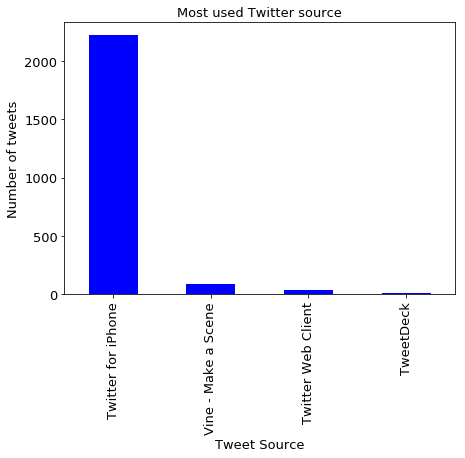

In [73]:
bar_plot = tweet_source2.plot.bar(color = 'blue', fontsize = 13)

#figure size(width, height)
bar_plot.figure.set_size_inches(7, 5);

#Add labels
plt.title('Most used Twitter source', color = 'black', fontsize = '13')
plt.xlabel('Tweet Source', color = 'black', fontsize = '13')
plt.ylabel('Number of tweets', color = 'black', fontsize = '13');

This shows that 94.3% of followers on the weratedogs twitter page use mostly an iphone device.

<b>2. Which of the dog stages appeared most and what it could mean.</b>

In [74]:
twitter_archive_master.dog_stage.value_counts(normalize=True).mul(100).round(1)

None        83.9
Pupper      10.4
Doggo       3.5 
Puppo       1.2 
Multiple    0.6 
Floofer     0.4 
Name: dog_stage, dtype: float64

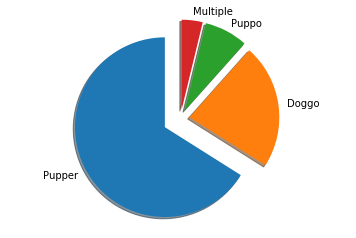

In [75]:
# Plot the data partitioned by dog stages while not including dogs with a dog stage

dog_stage_count = list(twitter_archive_master[twitter_archive_master['dog_stage'] != 'None']['dog_stage'].value_counts())[0:4]
dog_stages = twitter_archive_master[twitter_archive_master['dog_stage'] != 'None']['dog_stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

fig1, ax1 = plt.subplots()
ax1.pie(dog_stage_count, explode = explode, labels = dog_stages, shadow = True, startangle = 90)
ax1.axis('equal');

Most dogs do not have their stages included and the none value is assigned, meanwhile the pie chart above shows that the pupper is the most common named dog stage. Pupper stage is simply a slang name for a dog which is still a puppy. This means most named dog stages are actually not up to a year old.

<b>3. What day of the week has most retweet and favorite count</b>

In [76]:
s = twitter_archive_master.groupby('created_at')['retweet_count'].value_counts(normalize=True).reset_index(name='freq')
s.query('freq >= 0.5')

,created_at,retweet_count,freq
0,2015-11-15 22:32:08,532.0,1.0
1,2015-11-15 23:05:30,48.0,1.0
2,2015-11-15 23:21:54,47.0,1.0
3,2015-11-16 00:04:52,147.0,1.0
4,2015-11-16 00:24:50,41.0,1.0
5,2015-11-16 00:30:50,60.0,1.0
6,2015-11-16 00:35:11,879.0,1.0
7,2015-11-16 00:49:46,261.0,1.0
8,2015-11-16 00:55:59,146.0,1.0
9,2015-11-16 01:01:59,61.0,1.0


In [82]:
# data re-sampled based on each month
retweet_count = s.resample('M', on='created_at').retweet_count.sum()
retweet_count

created_at
2015-11-30    161442.0
2015-12-31    595698.0
2016-01-31    307950.0
2016-02-29    191096.0
2016-03-31    235493.0
2016-04-30    97674.0 
2016-05-31    133044.0
2016-06-30    381098.0
2016-07-31    345150.0
2016-08-31    333735.0
2016-09-30    384621.0
2016-10-31    441388.0
2016-11-30    440300.0
2016-12-31    400766.0
2017-01-31    631570.0
2017-02-28    433945.0
2017-03-31    404285.0
2017-04-30    288200.0
2017-05-31    480320.0
2017-06-30    365620.0
2017-07-31    381171.0
2017-08-31    15367.0 
Freq: M, Name: retweet_count, dtype: float64

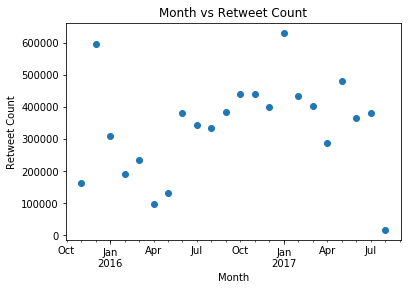

In [93]:
retweet_count.plot(x='Hours',y='Scores',style='o')
plt.title('Month vs Retweet Count')
plt.xlabel('Month')
plt.ylabel('Retweet Count')
plt.show()

The month of 2017-01-31 with a retweet count of 631570 and the month of 2015-12-31 with a retweet count of 595698 seem to experience a surge in engagements. This shows that twitter users on this @weratedogs twitter page seems to be more ative during the months of December and January. This could be as a result of the holidays.